In [1]:
import cv2 
import numpy as np
import time
import os,sys,inspect
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
%matplotlib inline

In [2]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
print('parentdir - ', parentdir)

parentdir -  /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/pankaja-compins/code/Users/pankaja_us


In [3]:
sys.path.insert(0,parentdir) 

In [4]:
import commonpy


In [5]:
import posepy

In [6]:
#~/cloudfiles/code/Users/pankaja_us/Pose-Estimation/QA/src/posepoints.py
sys.path.append(os.path.join(parentdir, "Pose-Estimation", "QA", "src"))
import posepoints

In [7]:
#run for some random 3 rgb files, this can be tuned to a percentage of image files as well
pose = 100
dsName = 'anon_rgb_training'
numfiles = 5
scans_rgb, mount_context, scanFilenamesOnly = commonpy.getScansFiles(dsName, pose, numfiles) 
if (len(scans_rgb) > 0):
    imgRangeMax = 1
    if (len(scans_rgb) > 1):
        imgRangeMax = len(scans_rgb)

#More tests can be done by adjusting the threshold as well

/tmp/tmpyobseazw
mount_context=  <azureml.dataprep.fuse.daemon.MountContext object at 0x7f98901a7e80>
scans path -  /tmp/tmpyobseazw/scans/1585551501-pjl8rs08kh/100


In [8]:
print('scanFilenamesOnly ', scanFilenamesOnly)

scanFilenamesOnly  ['rgb_1585551501-pjl8rs08kh_1593156347916_100_183770.577193759.jpg', 'rgb_1585551501-pjl8rs08kh_1593156347916_100_183769.17250875902.jpg', 'rgb_1585551501-pjl8rs08kh_1593156347916_100_183768.570589759.jpg', 'rgb_1585551501-pjl8rs08kh_1593156347916_100_183769.607412759.jpg', 'rgb_1585551501-pjl8rs08kh_1593156347916_100_183770.14240275903.jpg']


In [9]:
#Test - 1 
protoTxtPath = 'pose/body_25/body_25_deploy.prototxt'
pretrainedModelPath	= 'pose/body_25/pose_iter_584000.caffemodel'	
datasetType='default'
net = posepoints.init(protoTxtPath, pretrainedModelPath)


proto  pose/body_25/body_25_deploy.prototxt
cv2 dnn readNetFromCaffe


In [10]:
from commonpy import getTitleboxAndResizeFrame

time is  6.16945743560791


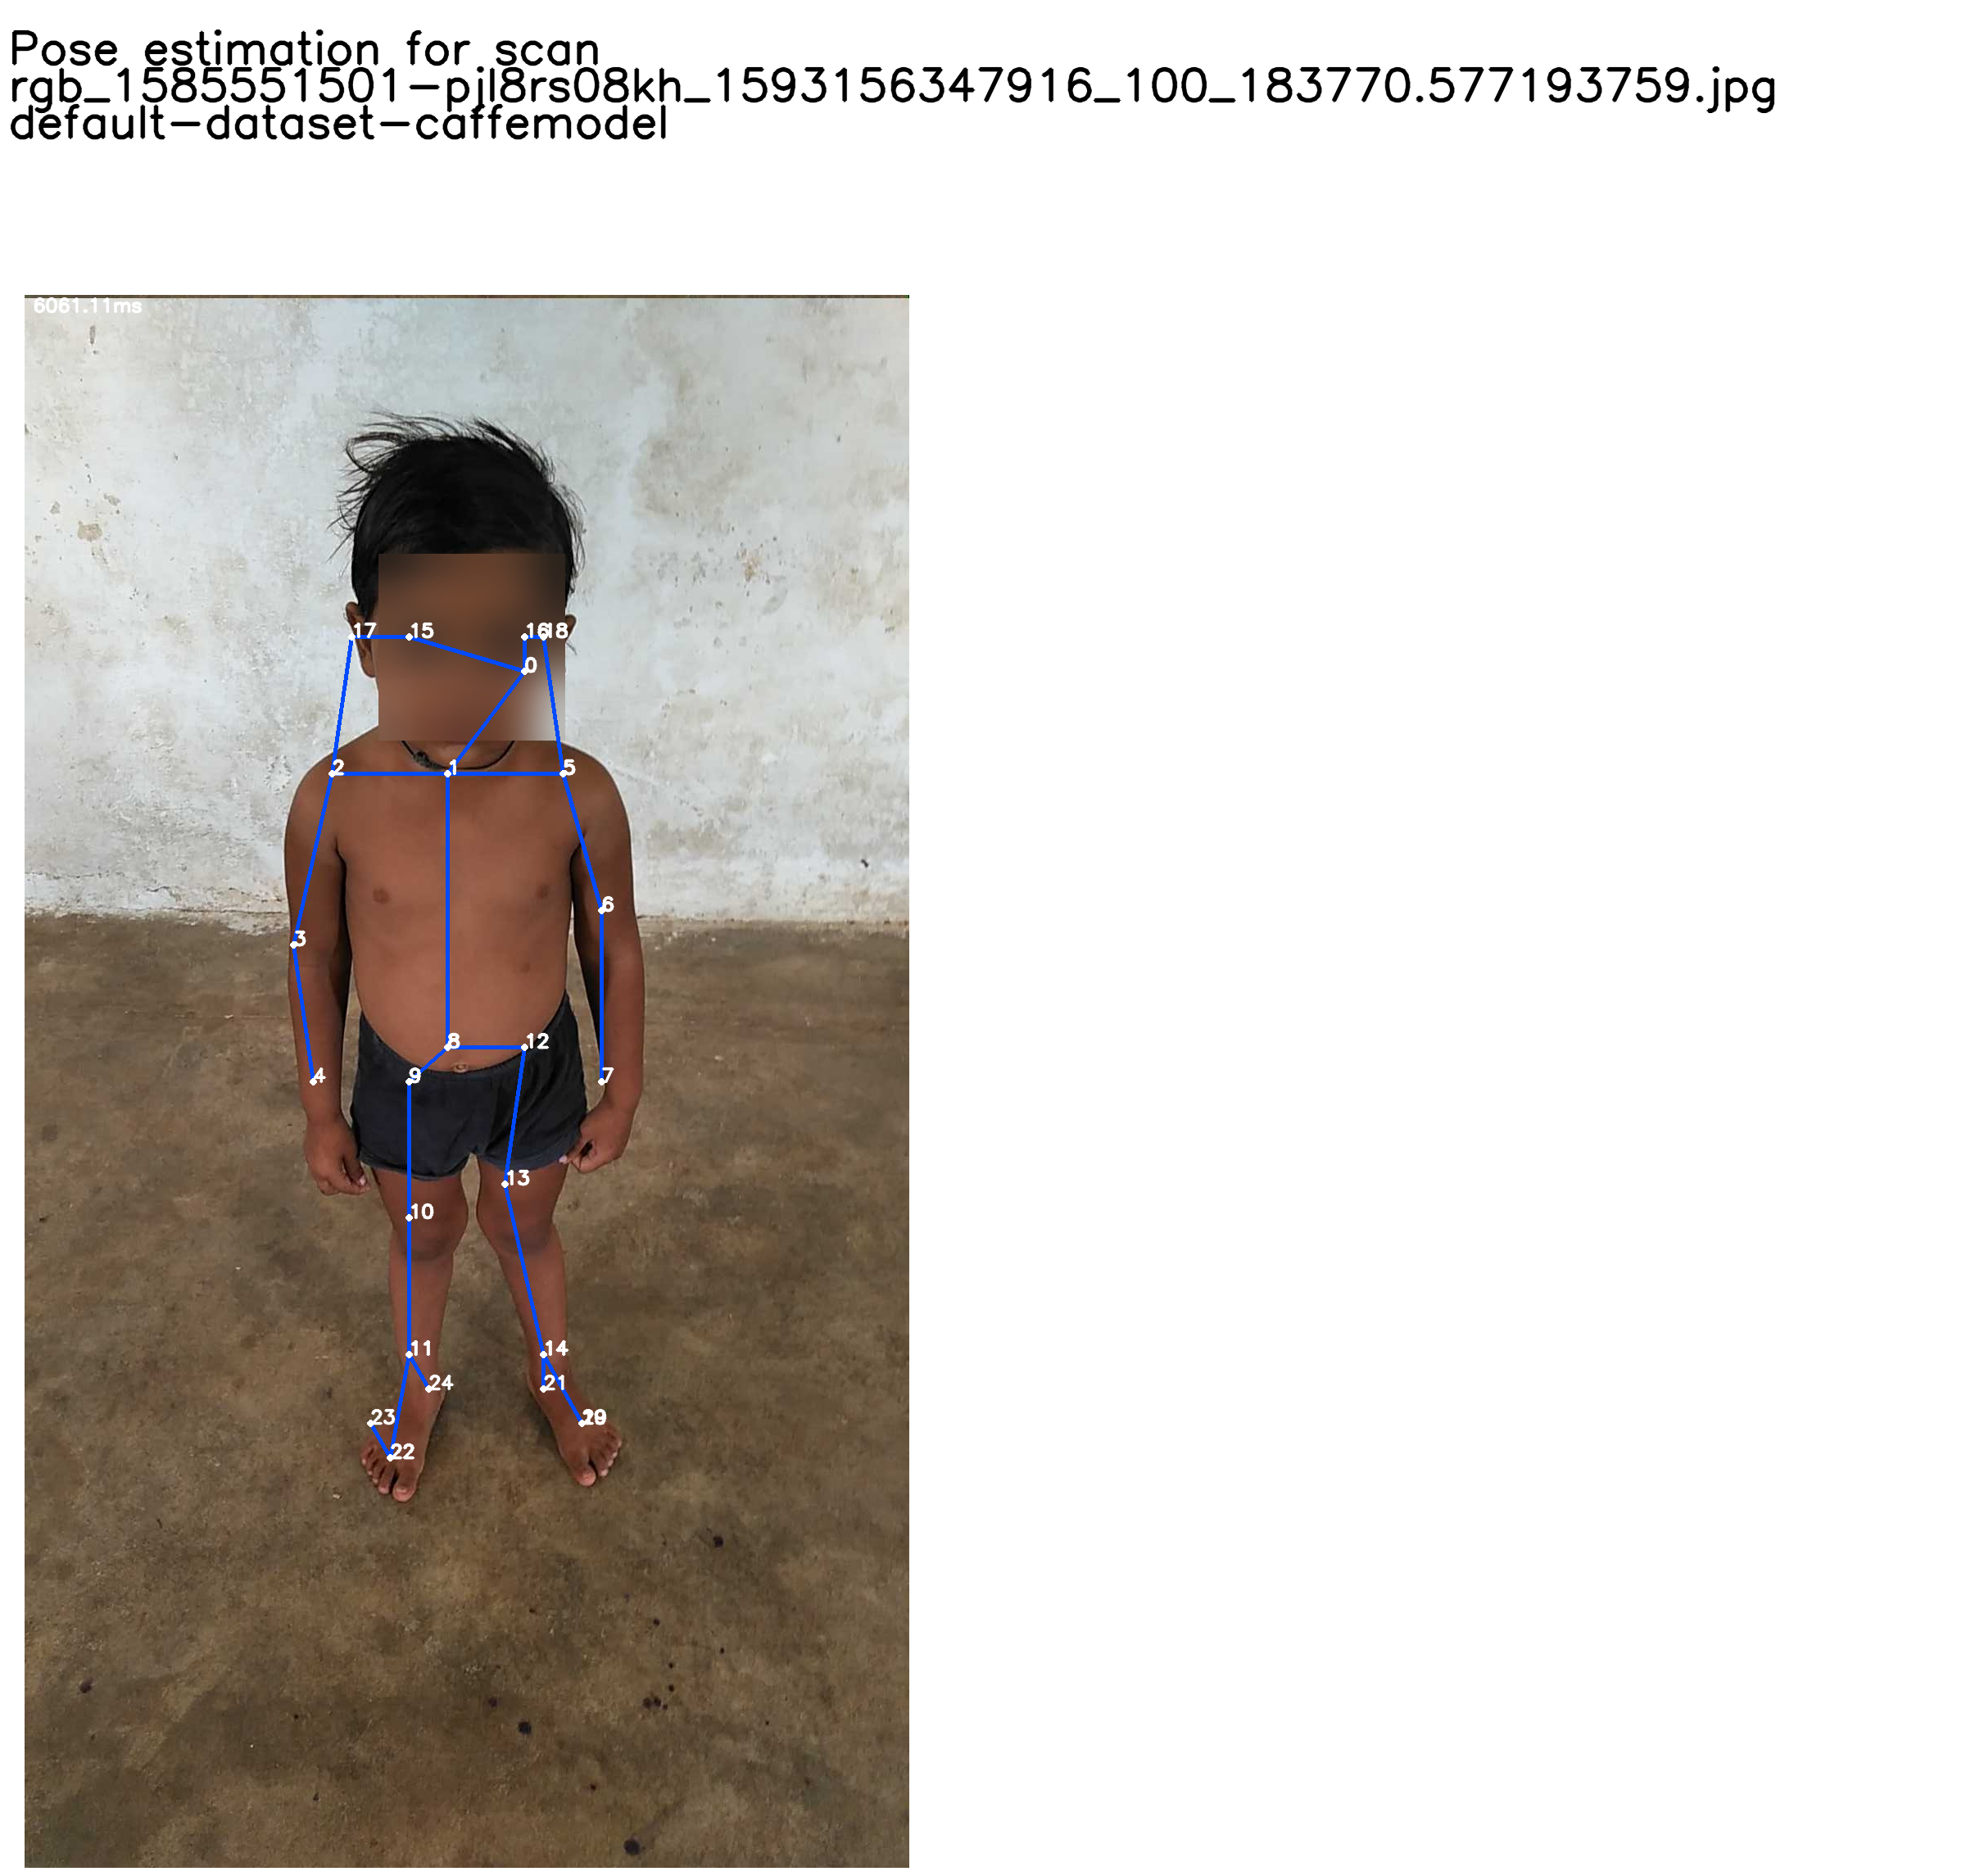

<Figure size 432x288 with 0 Axes>

In [11]:
#Test 1
idx = 0
#Fetch the pose details
datasetTypeAndModel, body_parts, pose_pairs = posepoints._setPoseDetails(datasetType)

#for idx in range(imgRangeMax):
for idx in range(1):
    imagePath = scans_rgb[idx]
    imageFilename = scanFilenamesOnly[idx]
    points = posepy._poseEstimationFromModelAndDataset(
        net, body_parts, pose_pairs, datasetTypeAndModel,
        imagePath, imageFilename, getTitleboxAndResizeFrame)


In [12]:
import pandas as pd
artifactList = ['']

df = pd.DataFrame({
            'artifact': '' 
    }, index=[1], columns =['artifact'])
df 

,artifact
1,


In [13]:

#Add the other columns
df, columns = posepoints._addColumnsToDataframe(body_parts, pose_pairs,
                df)


print('df.shape', df)

df.shape Empty DataFrame
Columns: [artifact, P18, P12, P15, P23, P34, P56, P67, P89, P910, P1011, P812, P1213, P1314, P10, P015, P1517, P016, P1618, P217, P518, P1419, P1920, P1421, P1122, P2223, P1124]
Index: []

[0 rows x 27 columns]


In [14]:
#print('numCols, cols ', len(df.columns), df.columns)
#print('respoints ', respoints)
points = []

for im in range(1):
    imagePath = scans_rgb[im]
    points = posepoints._poseEstimate(imagePath, net, body_parts, pose_pairs)
    print('points', points)



time is  6.074191570281982
points [[(516, 584), (516, 918)], [(516, 584), (375, 584)], [(516, 584), (657, 584)], [(375, 584), (328, 793)], [(328, 793), (352, 960)], [(657, 584), (704, 751)], [(704, 751), (704, 960)], [(516, 918), (469, 960)], [(469, 960), (469, 1126)], [(469, 1126), (469, 1293)], [(516, 918), (610, 918)], [(610, 918), (586, 1085)], [(586, 1085), (633, 1293)], [(516, 584), (610, 459)], [(610, 459), (469, 417)], [(469, 417), (399, 417)], [(610, 459), (610, 417)], [(610, 417), (633, 417)], [(375, 584), (399, 417)], [(657, 584), (633, 417)], [(633, 1293), (680, 1377)], [(680, 1377), (680, 1377)], [(633, 1293), (633, 1335)], [(469, 1293), (446, 1419)], [(446, 1419), (422, 1377)], [(469, 1293), (493, 1335)]]


In [ ]:
# NOTE: above print statements was issued just to prove that
# the points are in order, i.e. key and values belong together


In [15]:
print('len columns ', len(columns))
print('len points ', len(points))


len columns  26
len points  26


In [20]:
def getFilename(imPath):
    fName = ''
    fNameArr = imPath.split("/scans/")
    fName = fNameArr[1]
    return fName


In [22]:
z = 0
#df.drop(df.index, inplace=True)
df = pd.DataFrame(columns=df.columns)
df.set_index('artifact')
for i in range(len(scans_rgb)):
    imagePath = scans_rgb[i]
    points = posepoints._poseEstimate(imagePath, net, body_parts, pose_pairs)
    z = z+1
    fName = getFilename(imagePath)
    #print('fName ', fName)
    df.loc[z, "artifact"] = fName

    for key,value in zip(columns, points):
        df.loc[z, key]= value

    #print('points', points)

print(df.head())


time is  6.002760887145996
time is  5.93275785446167
time is  5.941194534301758
time is  6.1485841274261475
time is  6.123092889785767
                                            artifact  \
1  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
2  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
3  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
4  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
5  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   

                        P18                       P12  \
1  [(516, 584), (516, 918)]  [(516, 584), (375, 584)]   
2  [(516, 626), (540, 960)]  [(516, 626), (375, 626)]   
3  [(540, 626), (540, 960)]  [(540, 626), (375, 626)]   
4  [(516, 626), (540, 960)]  [(516, 626), (375, 626)]   
5  [(516, 626), (540, 960)]  [(516, 626), (352, 626)]   

                        P15                       P23  \
1  [(516, 584), (657, 584)]  [(375, 584), (328, 793)]   
2  [(516, 626), (680, 626)]  [(375, 626), (352, 793)]   
3  [(540, 626)

In [37]:
#changing width and height
z = 0
#df.drop(df.index, inplace=True)
df = pd.DataFrame(columns=df.columns)
df.set_index('artifact')
for i in range(len(scans_rgb)):
    imagePath = scans_rgb[i]
    points = posepoints._poseEstimate(imagePath, net, body_parts, pose_pairs,
                width=250, height=250)
    z = z+1
    fName = getFilename(imagePath)
    df.loc[z, "artifact"] = fName

    for key,value in zip(columns, points):
        df.loc[z, key]= value

    #print('points', points)

print(df.head())



time is  2.8959083557128906
time is  2.9732553958892822
time is  2.944331645965576
time is  2.9823808670043945
time is  2.938671350479126
                                            artifact  \
1  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
2  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
3  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
4  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   
5  1585551501-pjl8rs08kh/100/rgb_1585551501-pjl8r...   

                        P18                       P12  \
1  [(506, 600), (506, 900)]  [(506, 600), (371, 600)]   
2  [(506, 600), (506, 960)]  [(506, 600), (371, 600)]   
3  [(506, 600), (540, 960)]  [(506, 600), (371, 600)]   
4  [(506, 600), (506, 960)]  [(506, 600), (371, 600)]   
5  [(506, 600), (506, 900)]  [(506, 600), (371, 600)]   

                        P15                       P23  \
1  [(506, 600), (641, 600)]  [(371, 600), (337, 780)]   
2  [(506, 600), (641, 600)]  [(371, 600), (337, 780)]   
3  [(506, 6

In [39]:
dfFilename = 'df_currpoints.json'
if not os.path.exists('output'):
    os.makedirs('output', mode=0o777, exist_ok=False)
# write the file as json
df.to_json(f'./output/'+ dfFilename, index=True)

In [ ]:
#Just do sanity check by loading the csv to a dataframe
#dfRead = pd.read_csv(f'./output/'+ dfFilename,index_col=0)
#dfRead = pd.read_json(f"./output/{dfFilename}")
#dfRead.head()


In [ ]:
#Test - 2 
protoTxtPath = 'pose/coco/deploy_coco.prototxt'
pretrainedModelPath	= 'pose/coco/pose_iter_440000.caffemodel'	
datasetType='COCO'
idx = 0
#Fetch the pose details
datasetTypeAndModel, body_parts, POSE_PAIRS = posepoints._setPoseDetails(datasetType)

#for idx in range(imgRangeMax):
for idx in range(1):
    imagePath = scans_rgb[idx]
    imageFilename = scanFilenamesOnly[idx]
    points = posepy._poseEstimationFromModelAndDataset(
        net, body_parts, POSE_PAIRS, datasetTypeAndModel,
        imagePath, imageFilename, getTitleboxAndResizeFrame,
        writeImage=True)

In [ ]:
#unmount context
commonpy.stopMountContext(mount_context)

In [ ]:
#if you want different sets of rgbs for each test then uncomment
# blocks marked *** ADDITIONAL TESTING ***

TEST SCRIPTS - AS FUNCTIONS BELOW *****

In [ ]:
def Test1WithPose(dsName, pose, numfiles, getTitleboxAndResizeFrame, writeImage=False):
    scans_rgb, mount_context, scanFilenamesOnly = commonpy.getScansFiles(dsName, pose, numfiles) 
    if (len(scans_rgb) > 0):    
        imgRangeMax = 1
        if (len(scans_rgb) > 1):
            imgRangeMax = len(scans_rgb)

    protoTxtPath = 'pose/body_25/body_25_deploy.prototxt'
    pretrainedModelPath	= 'pose/body_25/pose_iter_584000.caffemodel'	
    datasetType='default'
    #Fetch the pose details
    datasetTypeAndModel, body_parts, POSE_PAIRS = posepoints.setPoseDetails(datasetType)

    idx = 0
    for idx in range(imgRangeMax):
    #for idx in range(1):
        imagePath = scans_rgb[idx]
        imageFilename = scanFilenamesOnly[idx]
        points = posepy._poseEstimationFromModelAndDataset(
                    net, body_parts, POSE_PAIRS, datasetTypeAndModel,
                    imagePath, imageFilename, getTitleboxAndResizeFrame,
                     writeImage=writeImage)

    #unmount context
    commonpy.stopMountContext(mount_context)


In [ ]:
def Test2WithPose(dsName, pose, numfiles, getTitleboxAndResizeFrame, writeImage=False):
    scans_rgb, mount_context, scanFilenamesOnly = commonpy.getScansFiles(dsName, pose, numfiles) 
    if (len(scans_rgb) > 0):    
        imgRangeMax = 1
        if (len(scans_rgb) > 1):
            imgRangeMax = len(scans_rgb)

    protoTxtPath = 'pose/coco/deploy_coco.prototxt'
    pretrainedModelPath	= 'pose/coco/pose_iter_440000.caffemodel'	
    datasetType='COCO'
    #Fetch the pose details
    datasetTypeAndModel, body_parts, POSE_PAIRS = posepoints.setPoseDetails(datasetType)

    idx = 0
    for idx in range(imgRangeMax):
        imagePath = scans_rgb[idx]
        imageFilename = scanFilenamesOnly[idx]
        points = posepy.poseEstimationFromModelAndDataset(
                    net, body_parts, POSE_PAIRS, datasetTypeAndModel,
                    imagePath, imageFilename, getTitleboxAndResizeFrame,
                    writeImage=writeImage)

    #unmount context
    commonpy.stopMountContext(mount_context)

In [ ]:
def TestWithPoseAndModel(dsName, pose, numfiles, modelByType, getTitleboxAndResizeFrame, writeImage=False):
    scans_rgb, mount_context, scanFilenamesOnly = commonpy.getScansFiles(dsName, pose, numfiles) 
    if (len(scans_rgb) > 0):    
        imgRangeMax = 1
        if (len(scans_rgb) > 1):
            imgRangeMax = len(scans_rgb)

    if (modelByType == 'body_25'):
        protoTxtPath = 'pose/body_25/body_25_deploy.prototxt'
        pretrainedModelPath	= 'pose/body_25/pose_iter_584000.caffemodel'	
        datasetType='default'
    elif (modelByType == 'coco'):
        protoTxtPath = 'pose/coco/deploy_coco.prototxt'
        pretrainedModelPath	= 'pose/coco/pose_iter_440000.caffemodel'	
        datasetType='COCO'
    
    #Fetch the pose details
    datasetTypeAndModel, body_parts, POSE_PAIRS = posepoints.setPoseDetails(datasetType)

    idx = 0
    for idx in range(imgRangeMax):
    #for idx in range(1):
        imagePath = scans_rgb[idx]
        imageFilename = scanFilenamesOnly[idx]
        points = posepy.poseEstimationFromModelAndDataset(
                    net, body_parts, POSE_PAIRS, datasetTypeAndModel,
                    imagePath, imageFilename, getTitleboxAndResizeFrame,
                    writeImage=writeImage)

    #unmount context
    commonpy.stopMountContext(mount_context)


In [ ]:
##*** ADDITIONAL TESTING ***
## TESTING WITH DIFFERENT SET OF RGB 
dsName = 'anon_rgb_training'
#pose = 100 #200
#numfiles = 2
#Test 1
#Test1WithPose(dsName, pose, numfiles, getTitleboxAndResizeFrame, writeImage=True)

##Test 2
#pose = 200
#numfiles = 3
#Test2WithPose(dsName, pose, numfiles, getTitleboxAndResizeFrame)

##Test 3
pose = 100
numfiles = 1
writeImage = False  #True
modelByType = 'body_25'
#modelbyType = 'coco'
TestWithPoseAndModel(dsName, pose, numfiles, modelByType, getTitleboxAndResizeFrame,
 writeImage=writeImage)
##*** ADDITIONAL TESTING ***